# Oilsands analysis

An exploratory analysis of Environment Canada's Open Government Data about the environmental trends within the Oilsands of Alberta. This is a data analysis on the Open Government Oil Sands data from Environment Canada. I will be going through my though processes along the way

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

## FISH HEALTH
' ' means no data was collected, '?' so far as I can tell is meaningless. 'x' means sample collected but not measured.

In [2]:
#Get all path pertaining to Wildish health
data_dir = 'data/OilSands/WildFishHealth/'
paths = os.listdir(data_dir)

#### Perform data exploration  on the Various Species
In this section we explore the health of Trout Perch within the Oil Sands Region. I chose this particular species because it had the most data to work with. My initial thoughts was to visualize the data as though I had been collecting it. Therefore I did a naive visualization based on date. My primary interest was on the potential effect the Oil Sands could have on it's reproductive habits. 

In [56]:
FishHealth = pd.read_csv(data_dir + paths[-2])
FishHealth.index = np.arange(len(FishHealth))
FishHealth['Gonad Weight (g)'] = FishHealth['Gonad Weight (g)'].replace({'-':None, 'x':None, '?':None})
FishHealth['Sex'] = FishHealth['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)']
FishHealth['Date'] = FishHealth['Date (yyyy-mm-dd)']
FishHealth['Date'] = pd.to_datetime(FishHealth['Date'])
FishHealth = FishHealth.drop(['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)' , 'Date (yyyy-mm-dd)'], axis=1)
dates = FishHealth['Date'].unique()

In [49]:
FishHealth['Gonad Weight (g)'].unique()

array(['0.169', '0.069', '0.061', '0.028', '0.08', '0.057', '0.208',
       '0.268', '0.088', '0.318', '0.447', '0.294', '0.467', '0.107',
       '0.041', '0.344', '0.387', '0.181', '0.261', '0.296', '0.489',
       '0.251', '0.047', '0.201', '0.234', '0.051', '0.05', '0.25',
       '0.211', '0.247', '0.022', '0.024', '0.045', '0.026', '0.032',
       '0.034', '0.345', '0.21', '0.231', '0.491', '0.103', '0.084',
       '0.304', '0.075', '0.302', '0.275', '0.121', '0.483', '0.216',
       '0.12', '0.09', '0.43', '0.308', '0.232', '0.482', '0.34', '0.044',
       '0.502', '0.063', '0.03', '0.436', '0.059', '0.198', '0.136',
       '0.078', '0.067', '0.281', '0.329', '0.316', '0.072', '0.037',
       '0.02', '0.029', '0.437', '0.087', '0.298', '0.581', '0.031',
       '0.353', '0.337', '0.273', '0.309', '0.4', '0.085', '0.276',
       '0.422', '0.262', '0.062', '0.372', '0.086', '0.052', '0.083',
       '0.111', '0.009', '0.074', '0.081', '0.082', '0.115', '0.077',
       '0.04', '0.333',

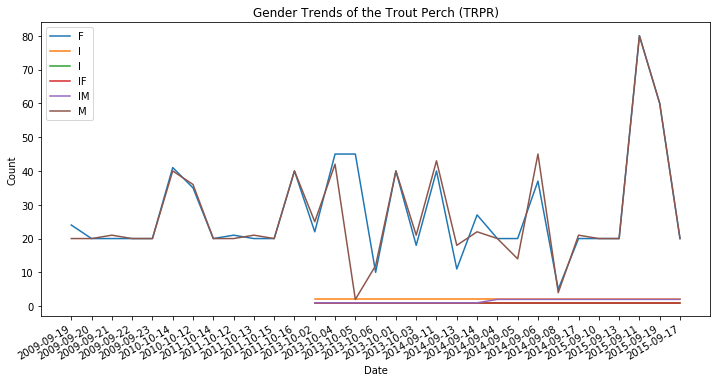

In [34]:
#Clean Sex data
sex = FishHealth.groupby(['Date', 'Sex']).count()
sex['Count'] = sex['Species']
sex = sex.reset_index()

#Visualize Sex Data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in sex.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Count'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gender Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc='best')    
plt.show()

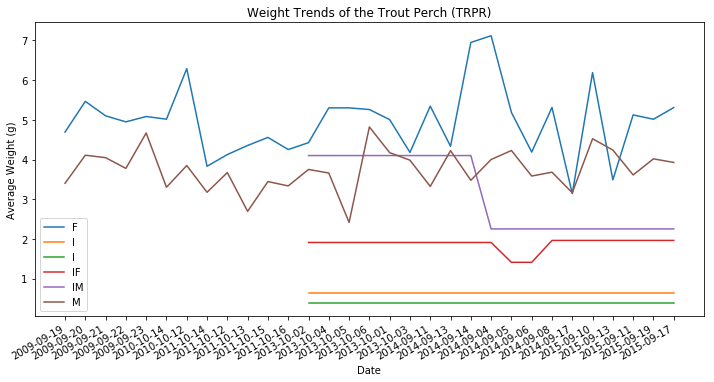

In [35]:
#Generate weight data
weight = FishHealth.groupby(['Date', 'Sex'])['Total Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Total Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Weight Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Weight (g)')
plt.legend(loc='best')    
plt.show()

In [37]:
FishHealth.columns


Index(['Site Name', 'Waterbody Name', 'Site & Description', 'Reach Code',
       'Latitude (Decimal Degrees)', 'Longitude Decimal Degrees)', 'Species',
       'Fish ID ', 'Length (mm)', 'Total Weight (g)', 'Age - Otolith',
       'Age - # of Otolith(s)', 'Age - Years', 'Gonad Weight (g)',
       'Liver Weight (g)', 'Liver (Mixed-Function Oxygenase [MFO])', 'NOTES',
       'Sex', 'Date'],
      dtype='object')

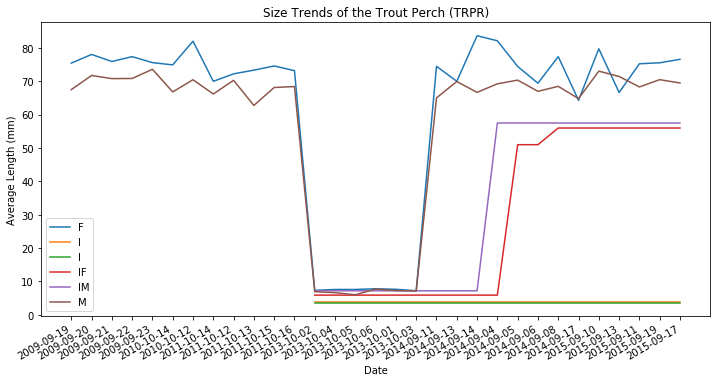

In [40]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Length (mm)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Length (mm)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Size Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Length (mm)')
plt.legend(loc='best')    
plt.show()

In [45]:
FishHealth.columns

Index(['Site Name', 'Waterbody Name', 'Site & Description', 'Reach Code',
       'Latitude (Decimal Degrees)', 'Longitude Decimal Degrees)', 'Species',
       'Fish ID ', 'Length (mm)', 'Total Weight (g)', 'Age - Otolith',
       'Age - # of Otolith(s)', 'Age - Years', 'Gonad Weight (g)',
       'Liver Weight (g)', 'Liver (Mixed-Function Oxygenase [MFO])', 'NOTES',
       'Sex', 'Date'],
      dtype='object')

In [46]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Gonad Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Gonad Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gonad Weight of ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Gonad Weight (g)')
plt.legend(loc='best')    
plt.show()

DataError: No numeric types to aggregate

In [16]:
FemaleHealth = FishHealth[FishHealth['Sex'] == 'F']
FishHealth['Contaminants - Liver']
#FemaleHealth.groupby(['Date'])['Contaminants - Liver'].count()


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
523      x
524      x
525      x
526      x
527      x
528      x
529      x
530      x
531      x
532      x
533      x
534      x
535      x
536      x
537      x
538      x
539      x
540      x
541      x
542      x
543      x
544      x
545      x
546      x
547      x
548      x
549      x
550      x
551      x
552      x
Name: Contaminants - Liver, Length: 553, dtype: object